In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
series1 = pd.Series([1,2,3,4,5,6,7])
series1

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [4]:
series2 = pd.Series(["1.2", "2.3", "1.2"])
series2

0    1.2
1    2.3
2    1.2
dtype: object

In [7]:
series1.values

array([1, 2, 3, 4, 5, 6, 7])

In [8]:
series1.index

RangeIndex(start=0, stop=7, step=1)

In [9]:
series3 = pd.Series([11, 12, 13, 14, 15], index=['mon', 'tue', 'wed', 'thu', 'fri'])
series3

mon    11
tue    12
wed    13
thu    14
fri    15
dtype: int64

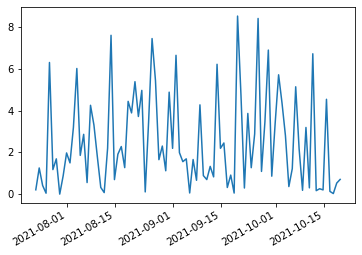

In [32]:
from datetime import datetime, timedelta 
import random 

times = []
values = []
other_values = []
for i in range(0, 100):
    current_time = datetime.now() - timedelta(days=i)
    times.append(current_time)
    values.append(random.random())
    other_values.append(random.random() * 10)

series4 = pd.Series(values, index=times)
series5 = pd.Series(other_values[:-10], index=times[:-10])
series6 = series4 * series5
series6.plot()

In [35]:
series6.describe()

count    90.000000
mean      2.505287
std       2.248824
min       0.005382
25%       0.699730
50%       1.822480
75%       3.880308
max       8.514772
dtype: float64

In [58]:
series6.index

DatetimeIndex(['2021-07-12 20:33:51.652996', '2021-07-13 20:33:51.652995',
               '2021-07-14 20:33:51.652994', '2021-07-15 20:33:51.652992',
               '2021-07-16 20:33:51.652991', '2021-07-17 20:33:51.652990',
               '2021-07-18 20:33:51.652989', '2021-07-19 20:33:51.652987',
               '2021-07-20 20:33:51.652986', '2021-07-21 20:33:51.652985',
               '2021-07-22 20:33:51.652984', '2021-07-23 20:33:51.652982',
               '2021-07-24 20:33:51.652980', '2021-07-25 20:33:51.652979',
               '2021-07-26 20:33:51.652978', '2021-07-27 20:33:51.652977',
               '2021-07-28 20:33:51.652975', '2021-07-29 20:33:51.652974',
               '2021-07-30 20:33:51.652973', '2021-07-31 20:33:51.652972',
               '2021-08-01 20:33:51.652970', '2021-08-02 20:33:51.652969',
               '2021-08-03 20:33:51.652968', '2021-08-04 20:33:51.652967',
               '2021-08-05 20:33:51.652965', '2021-08-06 20:33:51.652964',
               '2021-08-0

In [38]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
df1 = pd.DataFrame(data, columns=['year', 'state', 'pop'], index=['one', 'two', 'three', 'four', 'five'])
df1 

,year,state,pop
one,2000,Ohio,1.5
two,2001,Ohio,1.7
three,2002,Ohio,3.6
four,2001,Nevada,2.4
five,2002,Nevada,2.9


In [47]:
df1['debt'] = values[:5]
df1

,year,state,pop,debt
one,2000,Ohio,1.5,0.103271
two,2001,Ohio,1.7,0.869088
three,2002,Ohio,3.6,0.149563
four,2001,Nevada,2.4,0.196097
five,2002,Nevada,2.9,0.852513


In [50]:
series7 = pd.Series(other_values[:4], index=['two', 'four', 'five', 'six'])
df1['debt'] = series7
df1

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,6.859105
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,0.613921
five,2002,Nevada,2.9,0.212662


In [55]:
df1[df1['debt'] > 0.3]

two     6.859105
four    0.613921
Name: debt, dtype: float64

In [57]:
df1.T['one']

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: one, dtype: object

In [63]:
df2 = df1.reindex(['one', 'two', 'three', 'four', 'five', 'six', 'seven'], fill_value=0)
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,6.859105
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,0.613921
five,2002,Nevada,2.9,0.212662
six,0,0,0.0,0.000000
seven,0,0,0.0,0.000000


In [74]:
df2['col'] = 3

In [79]:
df1.add(df2, fill_value=0.9) 

,col,debt,pop,state,year
five,3.9,0.425324,5.8,NevadaNevada,4004.0
four,3.9,1.227843,4.8,NevadaNevada,4002.0
one,3.9,NaN,3.0,OhioOhio,4000.0
seven,3.9,0.900000,0.9,0.9,0.9
six,3.9,0.900000,0.9,0.9,0.9
three,3.9,NaN,7.2,OhioOhio,4004.0
two,3.9,13.718209,3.4,OhioOhio,4002.0


In [85]:
fill = lambda x: 10 * x if x else 0
df2['debt'].map(fill)

one            NaN
two      68.591045
three          NaN
four      6.139214
five      2.126621
six       0.000000
seven     0.000000
Name: debt, dtype: float64

In [87]:
df2.sort_index(axis=1)

,col,debt,pop,state,year
one,3,NaN,1.5,Ohio,2000
two,3,6.859105,1.7,Ohio,2001
three,3,NaN,3.6,Ohio,2002
four,3,0.613921,2.4,Nevada,2001
five,3,0.212662,2.9,Nevada,2002
six,3,0.000000,0.0,0,0
seven,3,0.000000,0.0,0,0


In [96]:
series9 = pd.Series([1,2,3,4], index=[1, 1, 2, 2])
unique_index = list(set(series9.index))
series9.index = [1, 2, 3, 4]

In [97]:
series9

1    1
2    2
3    3
4    4
dtype: int64

In [105]:
df1.mode(axis=1)

,0,1,2,3
one,2000,Ohio,1.5,NaN
two,2001,1.7,Ohio,6.859105
three,Ohio,2002,3.6,NaN
four,Nevada,2001,2.4,0.613921
five,Nevada,0.212662,2002,2.900000


In [118]:
df1['year']["one"] = None
df1.fillna({'year': df1['year'].median(), 'debt': df1['debt'].mean(skipna=True)})

,year,state,pop,debt
one,2001.5,Ohio,1.5,2.561896
two,2001.0,Ohio,1.7,6.859105
three,2002.0,Ohio,3.6,2.561896
four,2001.0,Nevada,2.4,0.613921
five,2002.0,Nevada,2.9,0.212662


In [117]:
df1['year'].median()

2001.5

In [133]:
df1[df1['year'] == 2001] = 2009

In [134]:
df1

,year,state,pop,debt
one,NaN,Ohio,1.5,NaN
two,2009.0,2009,2009.0,2009.0
three,2006.0,2006,2006.0,2006.0
four,2009.0,2009,2009.0,2009.0
five,2006.0,2006,2006.0,2006.0


In [135]:
df3 = pd.DataFrame(other_values)
df3.describe()

,0
count,100.000000
mean,4.458787
std,2.916655
min,0.038143
25%,2.040745
50%,3.817667
75%,6.889312
max,9.934940


In [138]:
df4 = df3[df3 < 7]
df4.describe()

,0
count,76.000000
mean,3.215766
std,2.117926
min,0.038143
25%,1.376035
50%,2.764349
75%,5.109941
max,6.970710


In [139]:
import numpy as np

In [140]:
df5 = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))

In [144]:
sampler = np.random.permutation(5)
df5.take(sampler)

,0,1,2,3
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3
3,12,13,14,15
1,4,5,6,7


In [150]:
rand_sample = np.random.choice(df5.index, 2)
df5[rand_sample]

,1,1
0,1,1
1,5,5
2,9,9
3,13,13
4,17,17


In [151]:
rand_sample

array([1, 1])